In [18]:
import numpy as np
import matplotlib.pyplot as plt

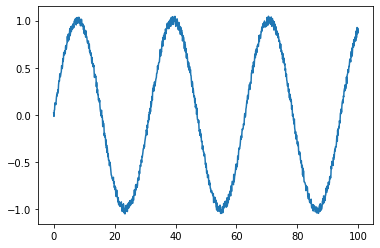

In [19]:
dt = 0.1
dur = 100.

time_ = np.arange(0,dur, dt)
amp = 0.05

signal_0 = np.sin(0.2 * time_)
for t in range(len(signal_0)):
    signal_0[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_0)
plt.show()

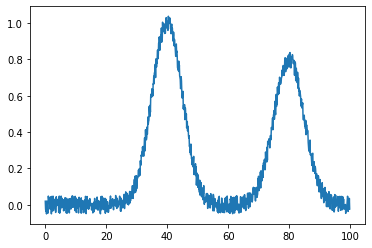

In [20]:
signal_1 = np.exp(- 0.02 * (40.-time_)**2)
signal_1 += 0.8 * np.exp(- 0.02 * (80.-time_)**2)
for t in range(len(signal_1)):
    signal_1[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_1)
plt.show()

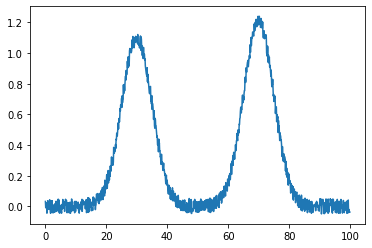

In [21]:
signal_2 = 1.1 * np.exp(- 0.02 * (30.-time_)**2)
signal_2 += 1.2 * np.exp(- 0.02 * (70.-time_)**2)
for t in range(len(signal_2)):
    signal_2[t] += np.random.uniform(-amp, amp)
    
plt.plot(time_, signal_2)
plt.show()

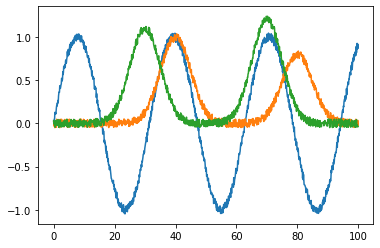

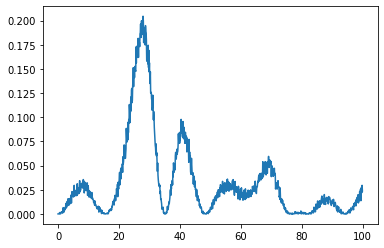

In [22]:
signal_array = np.stack((signal_0, signal_1, signal_2), axis=0)

for n in range(signal_array.shape[0]):
    plt.plot(time_, signal_array[n,:])
plt.show()

f_ = f_var(signal_array)
plt.plot(time_, f_)
plt.show()

In [23]:
def f_var(signal_array):
    f_mean = np.mean(signal_array, axis=0)
    f_ = np.zeros((f_mean.shape))
    
    for t in range(len(f_)):
        for n in range(signal_array.shape[0]):
            f_[t] = (signal_array[n,t] - f_mean[t])**2 / (signal_array.shape[0]+1)
        
    return f_

def f_int(f_,dt):
    cost = 0.
    for t in range(len(f_)):
        cost += dt * f_[t]
    return cost
        
def derSignal(signal_array, ds):
    der_signal = np.zeros((signal_array.shape))
    signal_ds = signal_array.copy()
    f_var0 = f_var(signal_array)

    for n in range(der_signal.shape[0]):
        for t in range(der_signal.shape[1]):
            signal_ds[n,t] += ds
            der_signal[n,t] = ( f_var(signal_ds)[t] - f_var0[t] ) / ds
            signal_ds[n,t] -= ds
            
    return der_signal

--------------- 0
cost =  3.2254885723270172


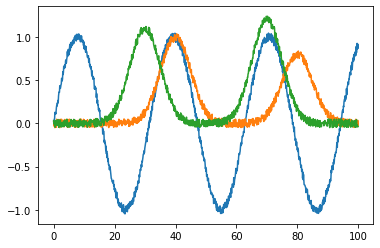

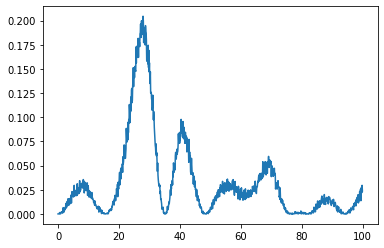

--------------- 1
cost =  3.011168677647219
--------------- 2
cost =  2.8110095242729822
--------------- 3
cost =  2.624079100889502
--------------- 4
cost =  2.4495066179031992
--------------- 5
cost =  2.286478489911091


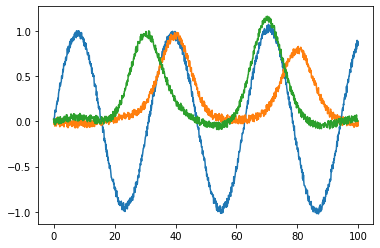

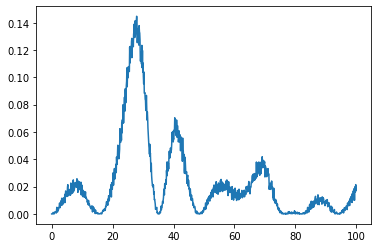

--------------- 6
cost =  2.1342345816784274
--------------- 7
cost =  1.9920647003457028
--------------- 8
cost =  1.8593053177189682
--------------- 9
cost =  1.7353365075557623
--------------- 10
cost =  1.6195790837485777


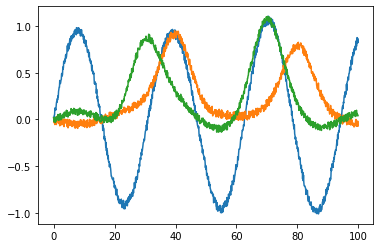

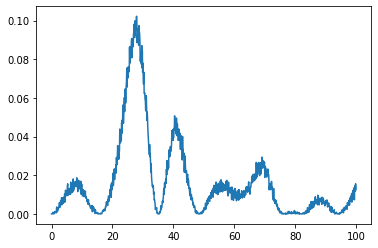

--------------- 11
cost =  1.5114919262318165
--------------- 12
cost =  1.4105694823021255
--------------- 13
cost =  1.3163394318489872
--------------- 14
cost =  1.2283605057468174
--------------- 15
cost =  1.146220447364497


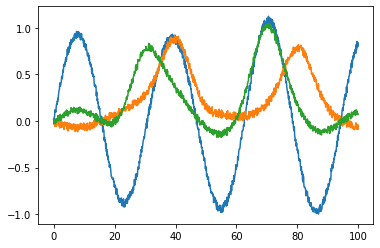

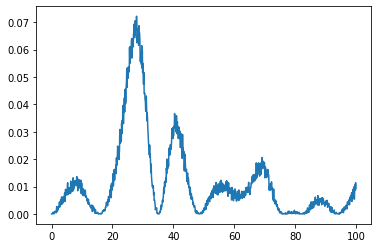

--------------- 16
cost =  1.069534107806772
--------------- 17
cost =  0.9979416661174443
--------------- 18
cost =  0.9311069662493074
--------------- 19
cost =  0.8687159631429953
--------------- 20
cost =  0.8104752707591765


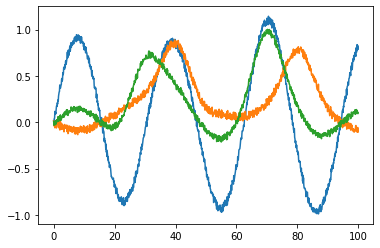

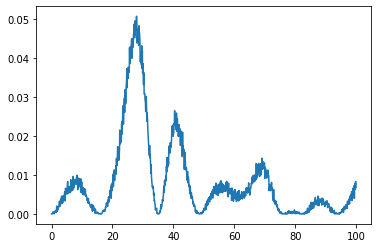

--------------- 21
cost =  0.7561108053776399
--------------- 22
cost =  0.7053665179152164
--------------- 23
cost =  0.6580032094242624
--------------- 24
cost =  0.6137974243161254
--------------- 25
cost =  0.5725404162118745


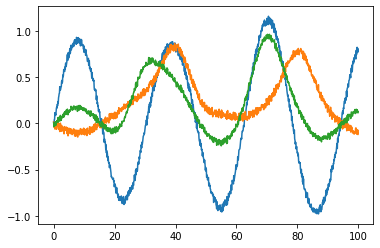

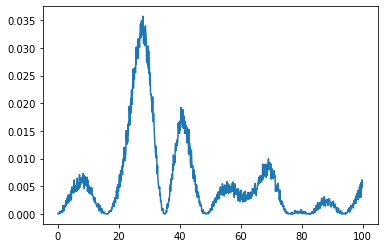

--------------- 26
cost =  0.5340371816567305
--------------- 27
cost =  0.4981055572470682
--------------- 28
cost =  0.4645753760106737
--------------- 29
cost =  0.4332876791537547


In [24]:
step = 0.1
ds = 0.1

for k in range(30):
    print("---------------", k)
    
    f_ = f_var(signal_array)
    cost = f_int(f_,dt)
    print("cost = ", cost)
    
    if k%5 == 0:
    
        for n in range(signal_array.shape[0]):
            plt.plot(time_, signal_array[n,:])
        plt.show()

        plt.plot(time_, f_)
        plt.show()
    
    der_signal = derSignal(signal_array, ds)
    signal_array -= step * der_signal